In [69]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
import streamlit as st

## Load Data

In [36]:
df = pd.read_csv("Adult.csv")

## UNDERSTANDING DATA

In [37]:
df 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [38]:
# age: Age of the person.
# fnlwgt: Final weight (this is the number of people the census believes the entry represents)
# education-num: Number of years of education completed
# capital-gain: Capital gains from investments
# capital-loss: Capital losses from investments
# education: Highest education done by the person
# education-num: Education number done by the person.
# marital-status: Marital status of the person
# occupation: occupation of the person
# relationship: Relationship status of the person
# race: Race of the person
# sex: Sex of the person
# hours-per-week: Hours per week worked by the person
# native-country: Native country of the person
# Income: Income status of the person

### checking data types 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print('____________________________')

Column: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
____________________________
Column: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
____________________________
Column: marital.status
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse       

### handling inconsistant values

In [42]:
indices_of_wrong_values = df[df['occupation'].isin(["?"])].index
df.drop(indices_of_wrong_values,axis=0,inplace=True)
df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [43]:
indices_of_wrong_values = df[df['workclass'].isin(["?"])].index
df.drop(indices_of_wrong_values,axis=0,inplace=True)
df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [44]:
indices_of_wrong_values = df[df['native.country'].isin(["?"])].index
df.drop(indices_of_wrong_values,axis=0,inplace=True)
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

## EDA

Column: workclass
workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


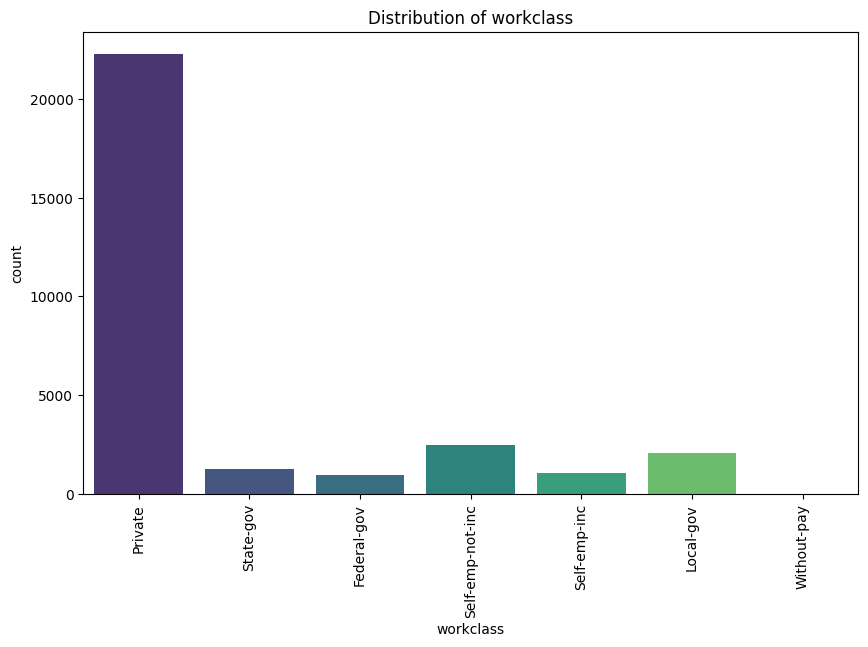

C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


Column: education
education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64


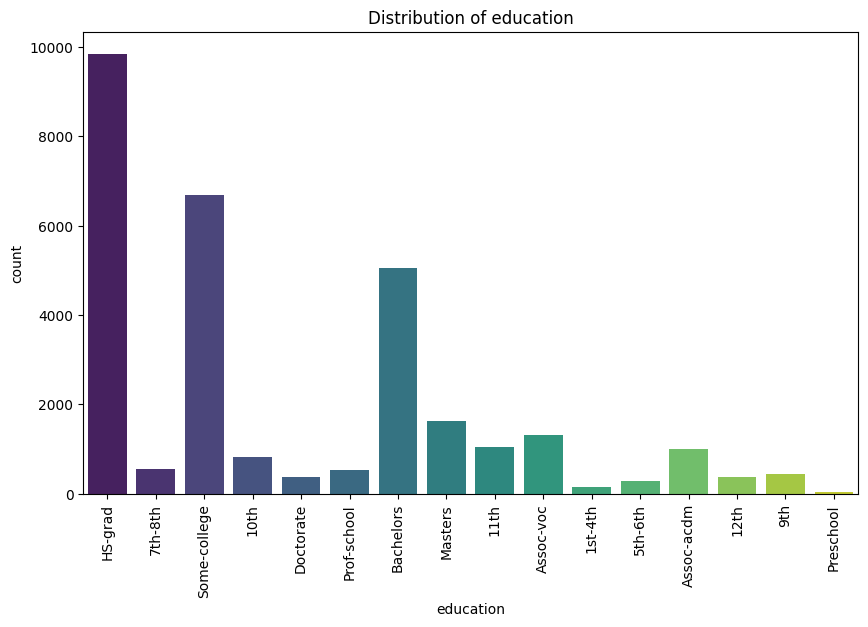

Column: marital.status
marital.status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


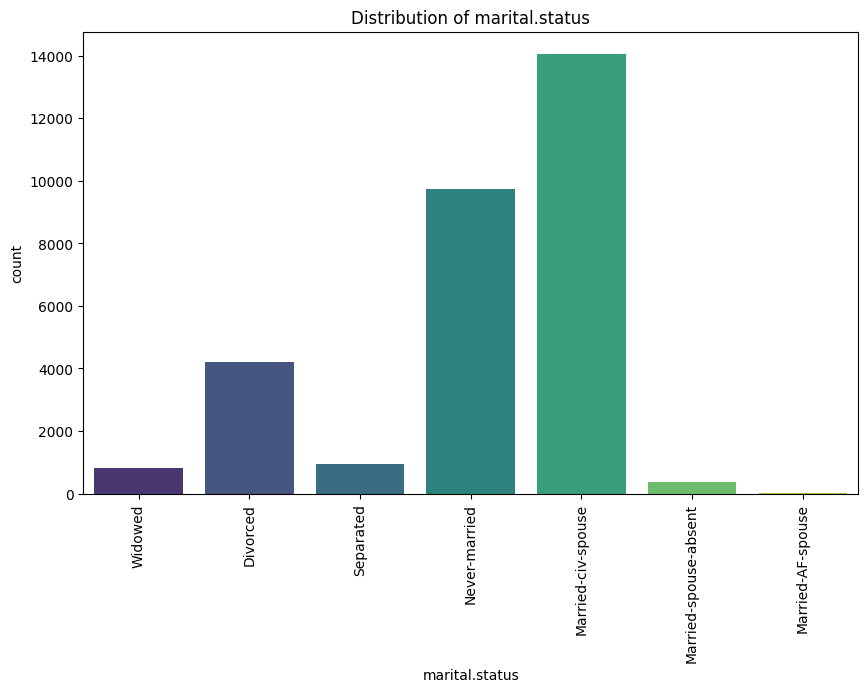

Column: occupation
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


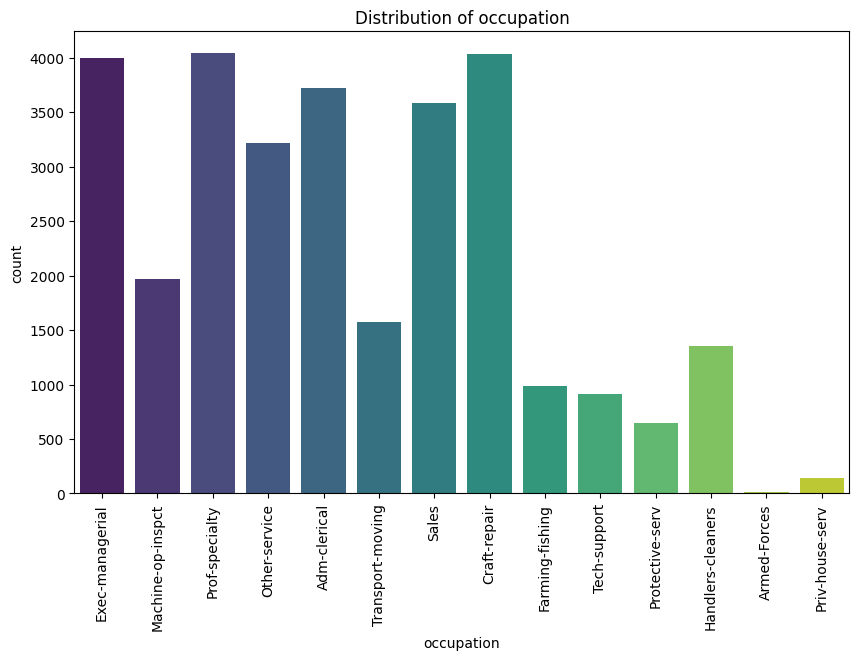

Column: relationship
relationship
Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


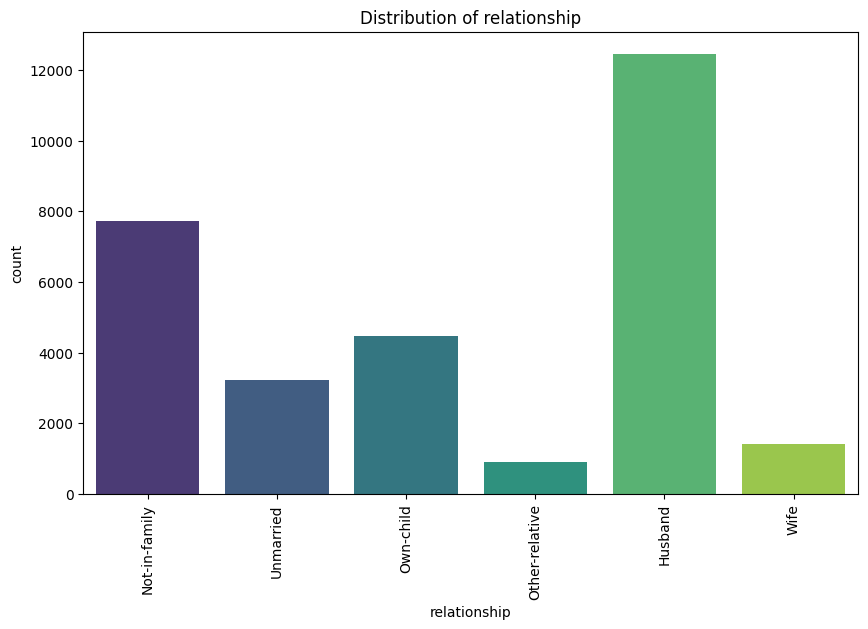

C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


Column: race
race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64


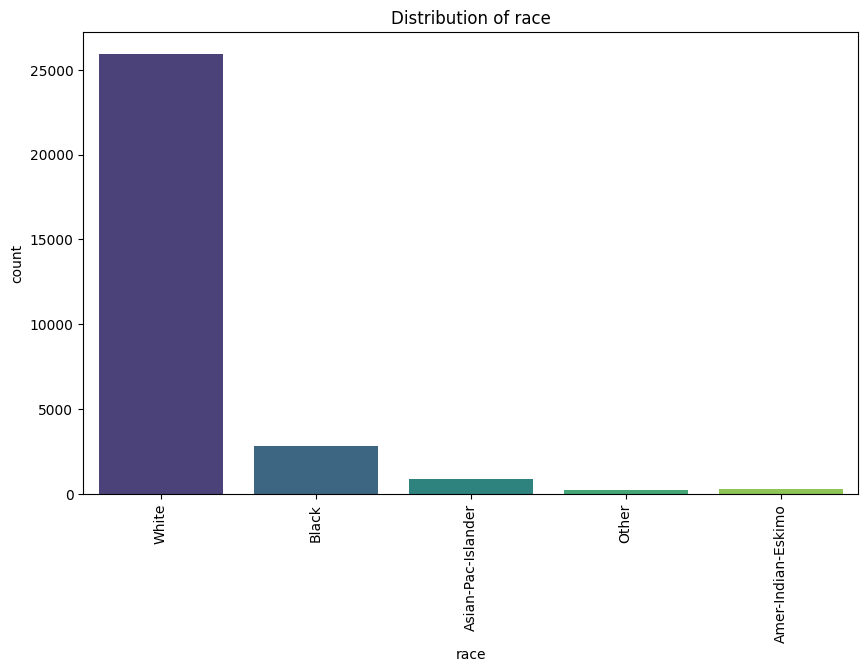

Column: sex
sex
Male      20380
Female     9782
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


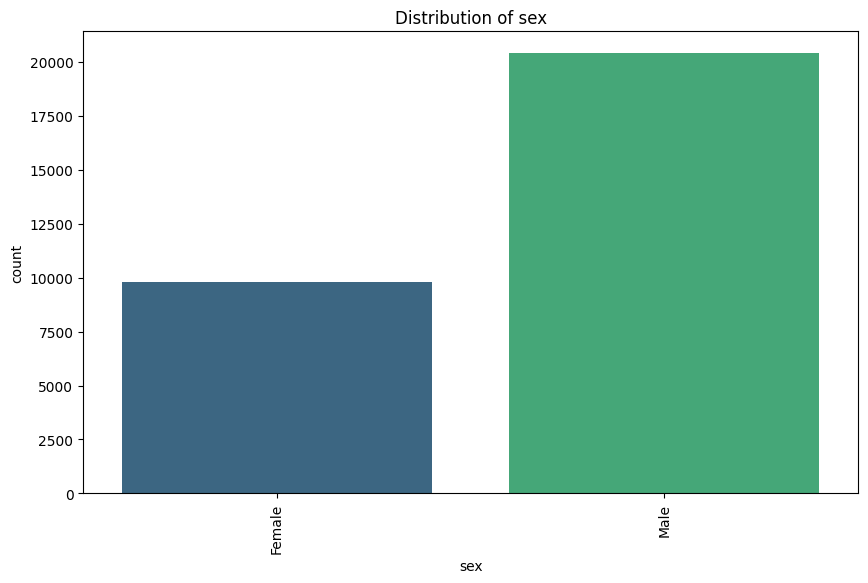

C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


Column: native.country
native.country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                    

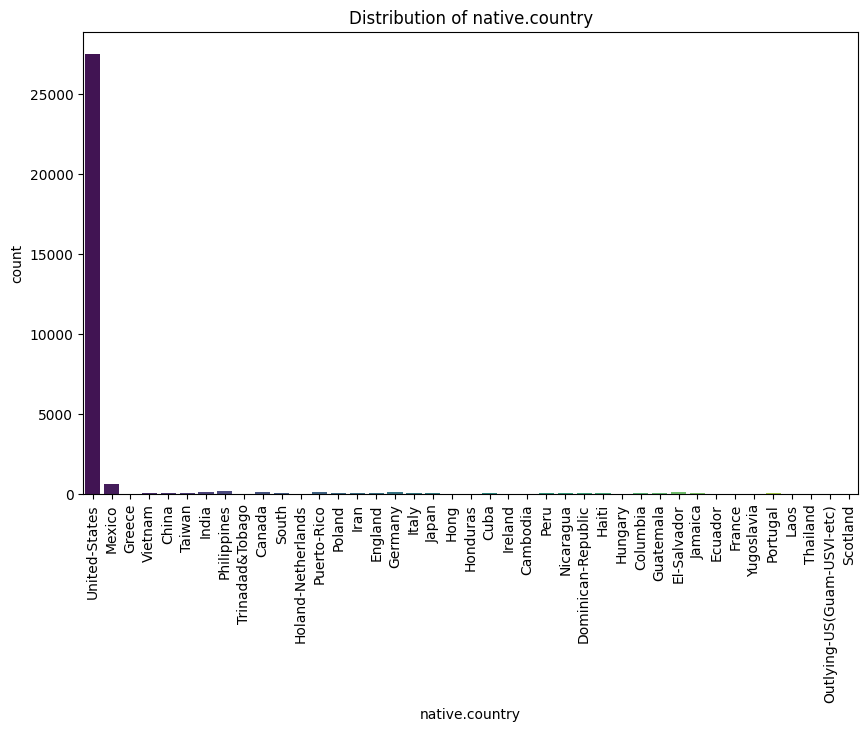

Column: income
income
<=50K    22654
>50K      7508
Name: count, dtype: int64


C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2165030291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


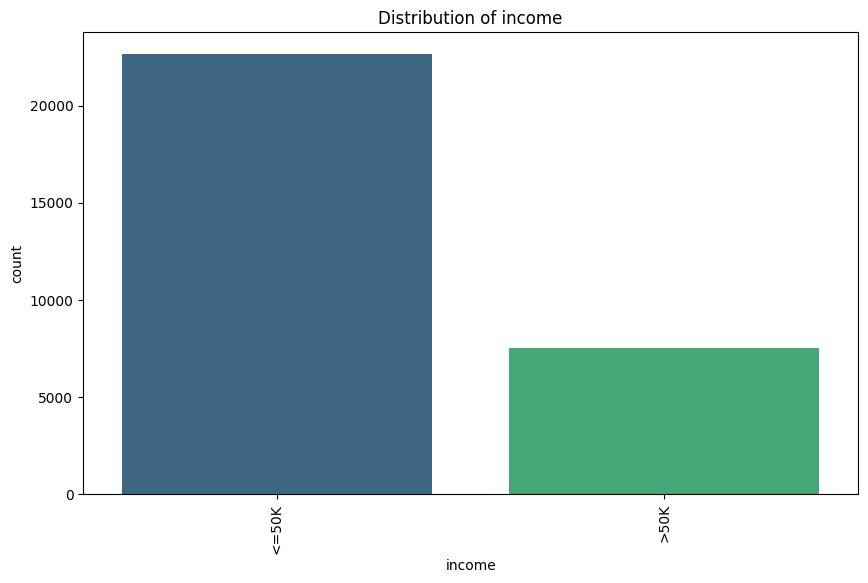

In [45]:
# Univariate Analysis for Categorical Columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    
    # Plotting Bar Plot for Categorical Data
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

Column: age
count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


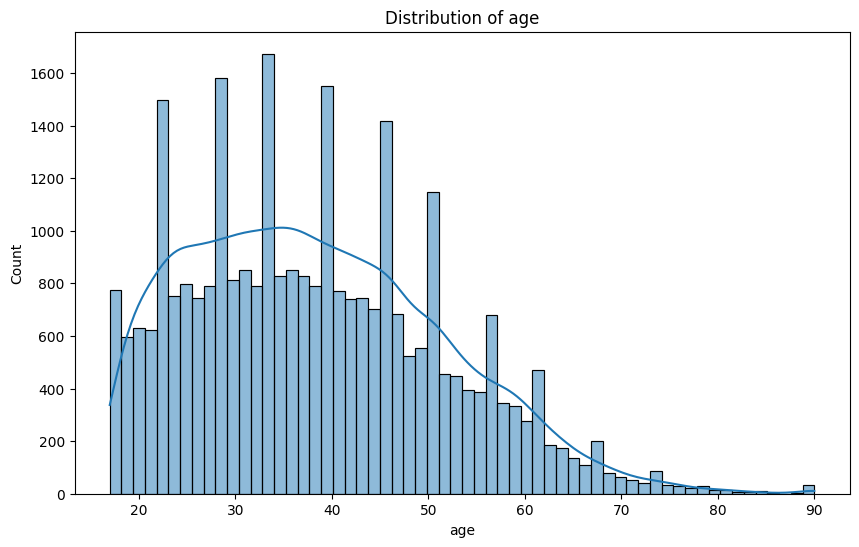

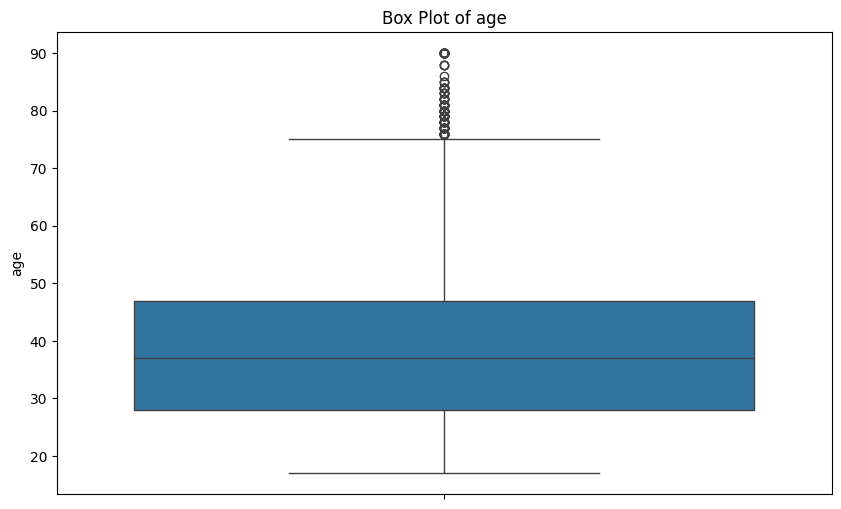

Column: fnlwgt
count    3.016200e+04
mean     1.897938e+05
std      1.056530e+05
min      1.376900e+04
25%      1.176272e+05
50%      1.784250e+05
75%      2.376285e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


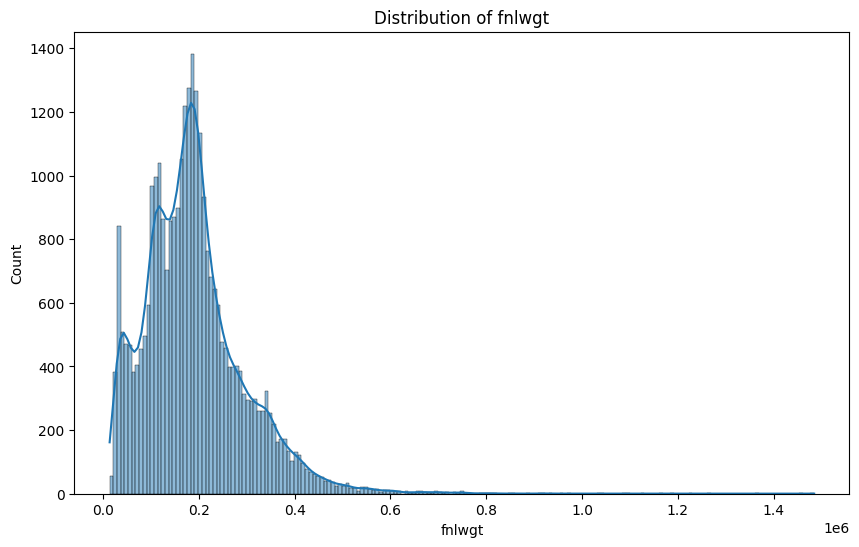

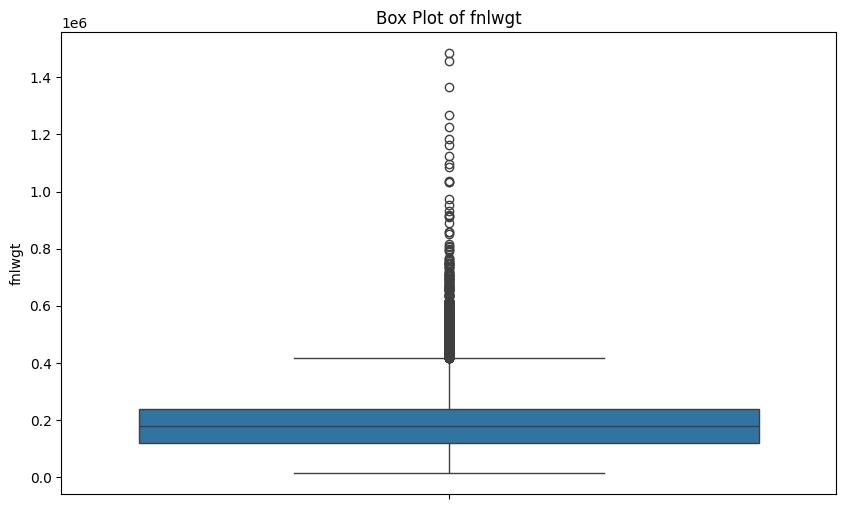

Column: education.num
count    30162.000000
mean        10.121312
std          2.549995
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education.num, dtype: float64


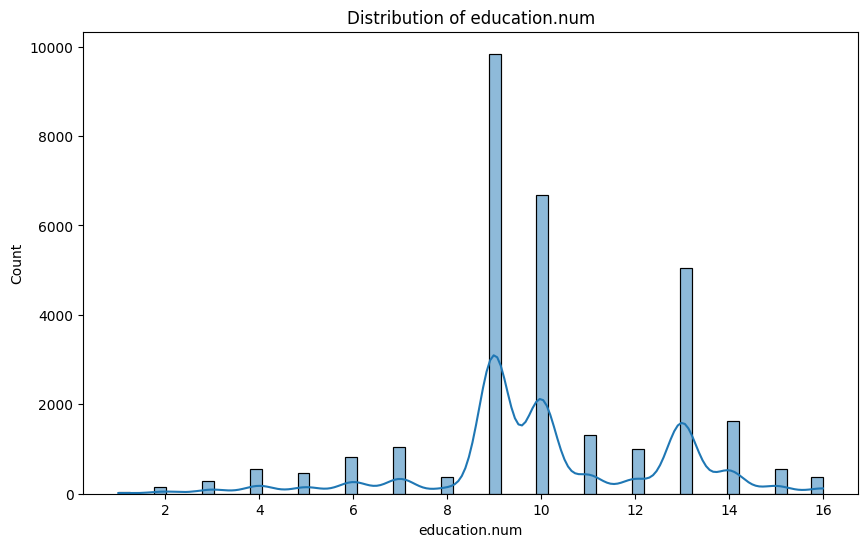

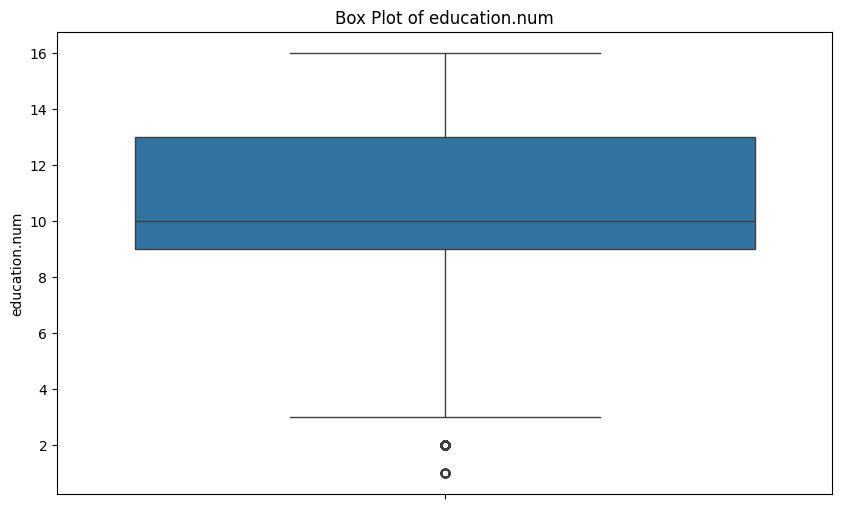

Column: capital.gain
count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


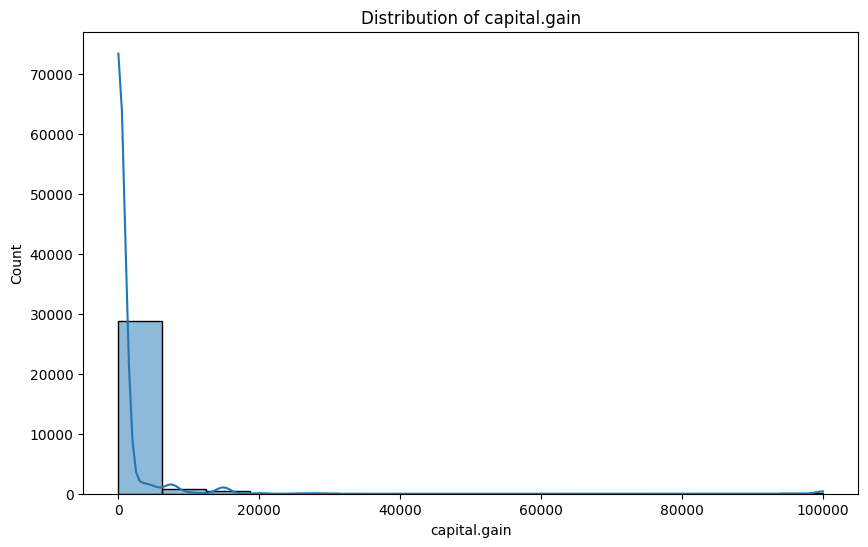

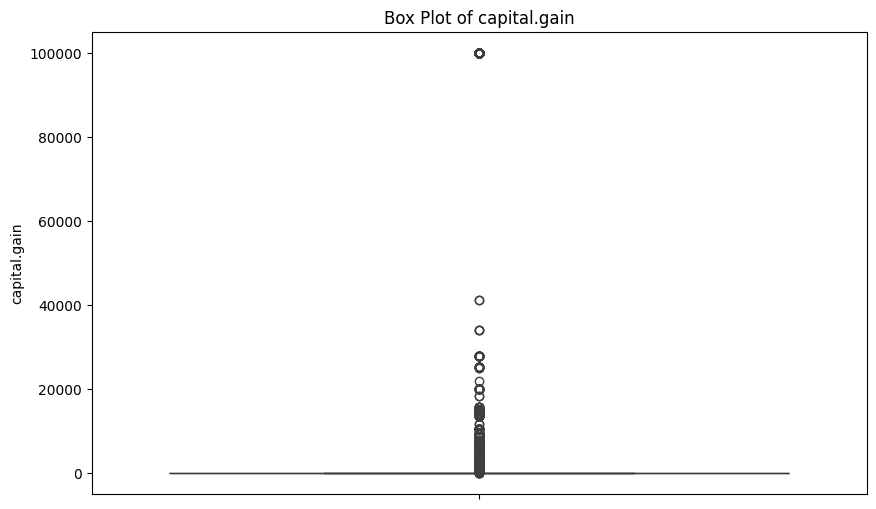

Column: capital.loss
count    30162.000000
mean        88.372489
std        404.298370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


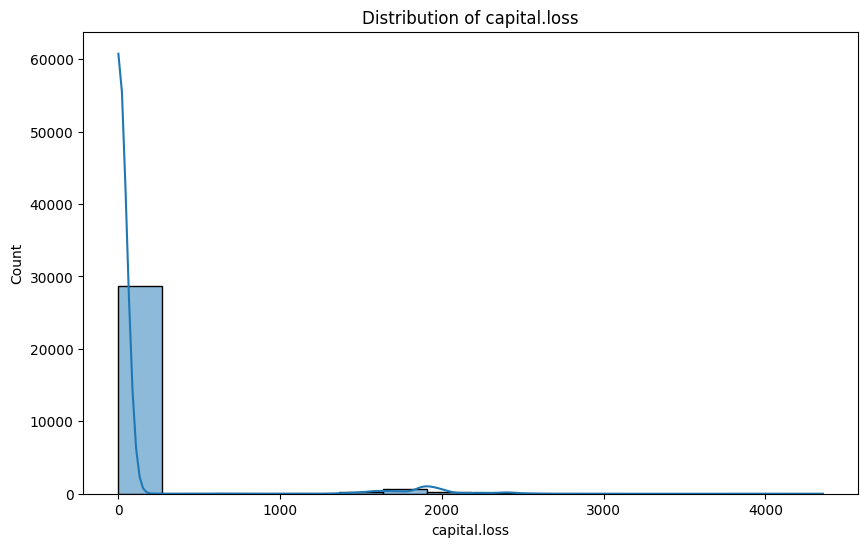

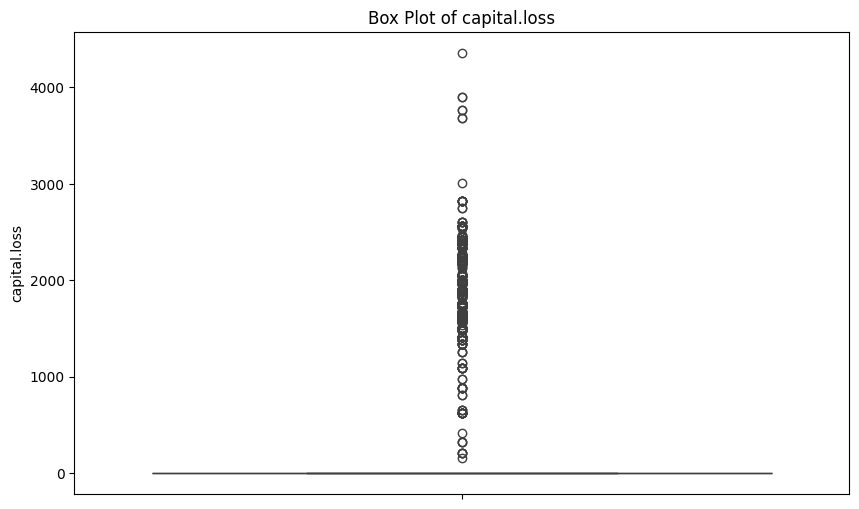

Column: hours.per.week
count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


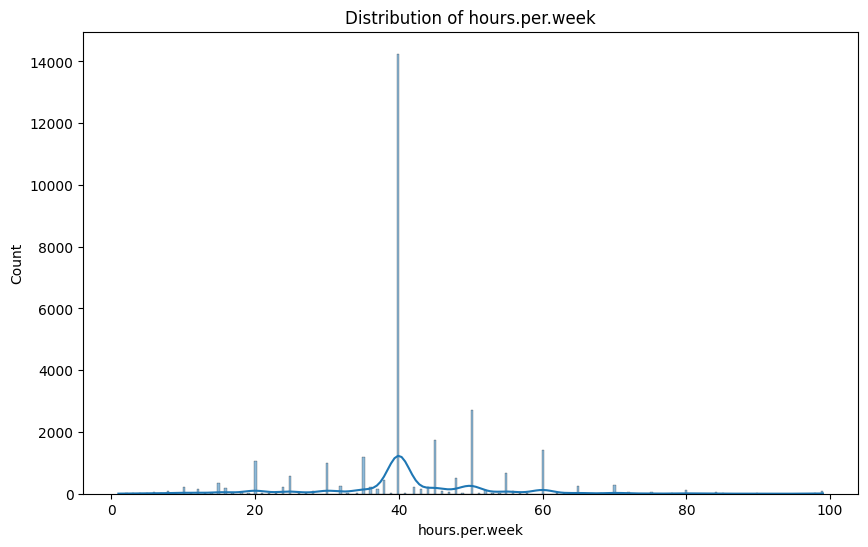

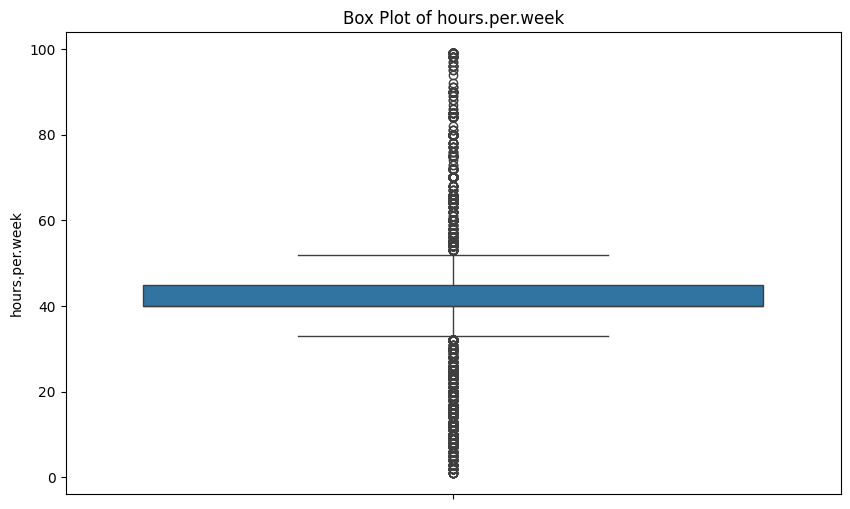

In [46]:
# Univariate Analysis for Numerical Columns
for col in df.select_dtypes(include=['number']).columns:
    print(f"Column: {col}")
    print(df[col].describe())
    
    # Plotting Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # Plotting Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

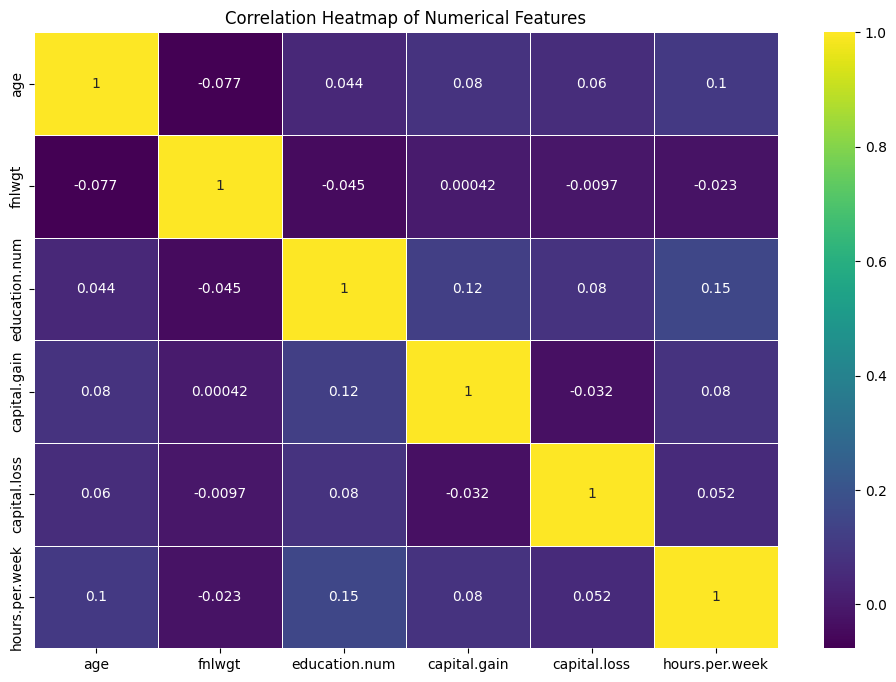

In [47]:
numerical_data = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [48]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

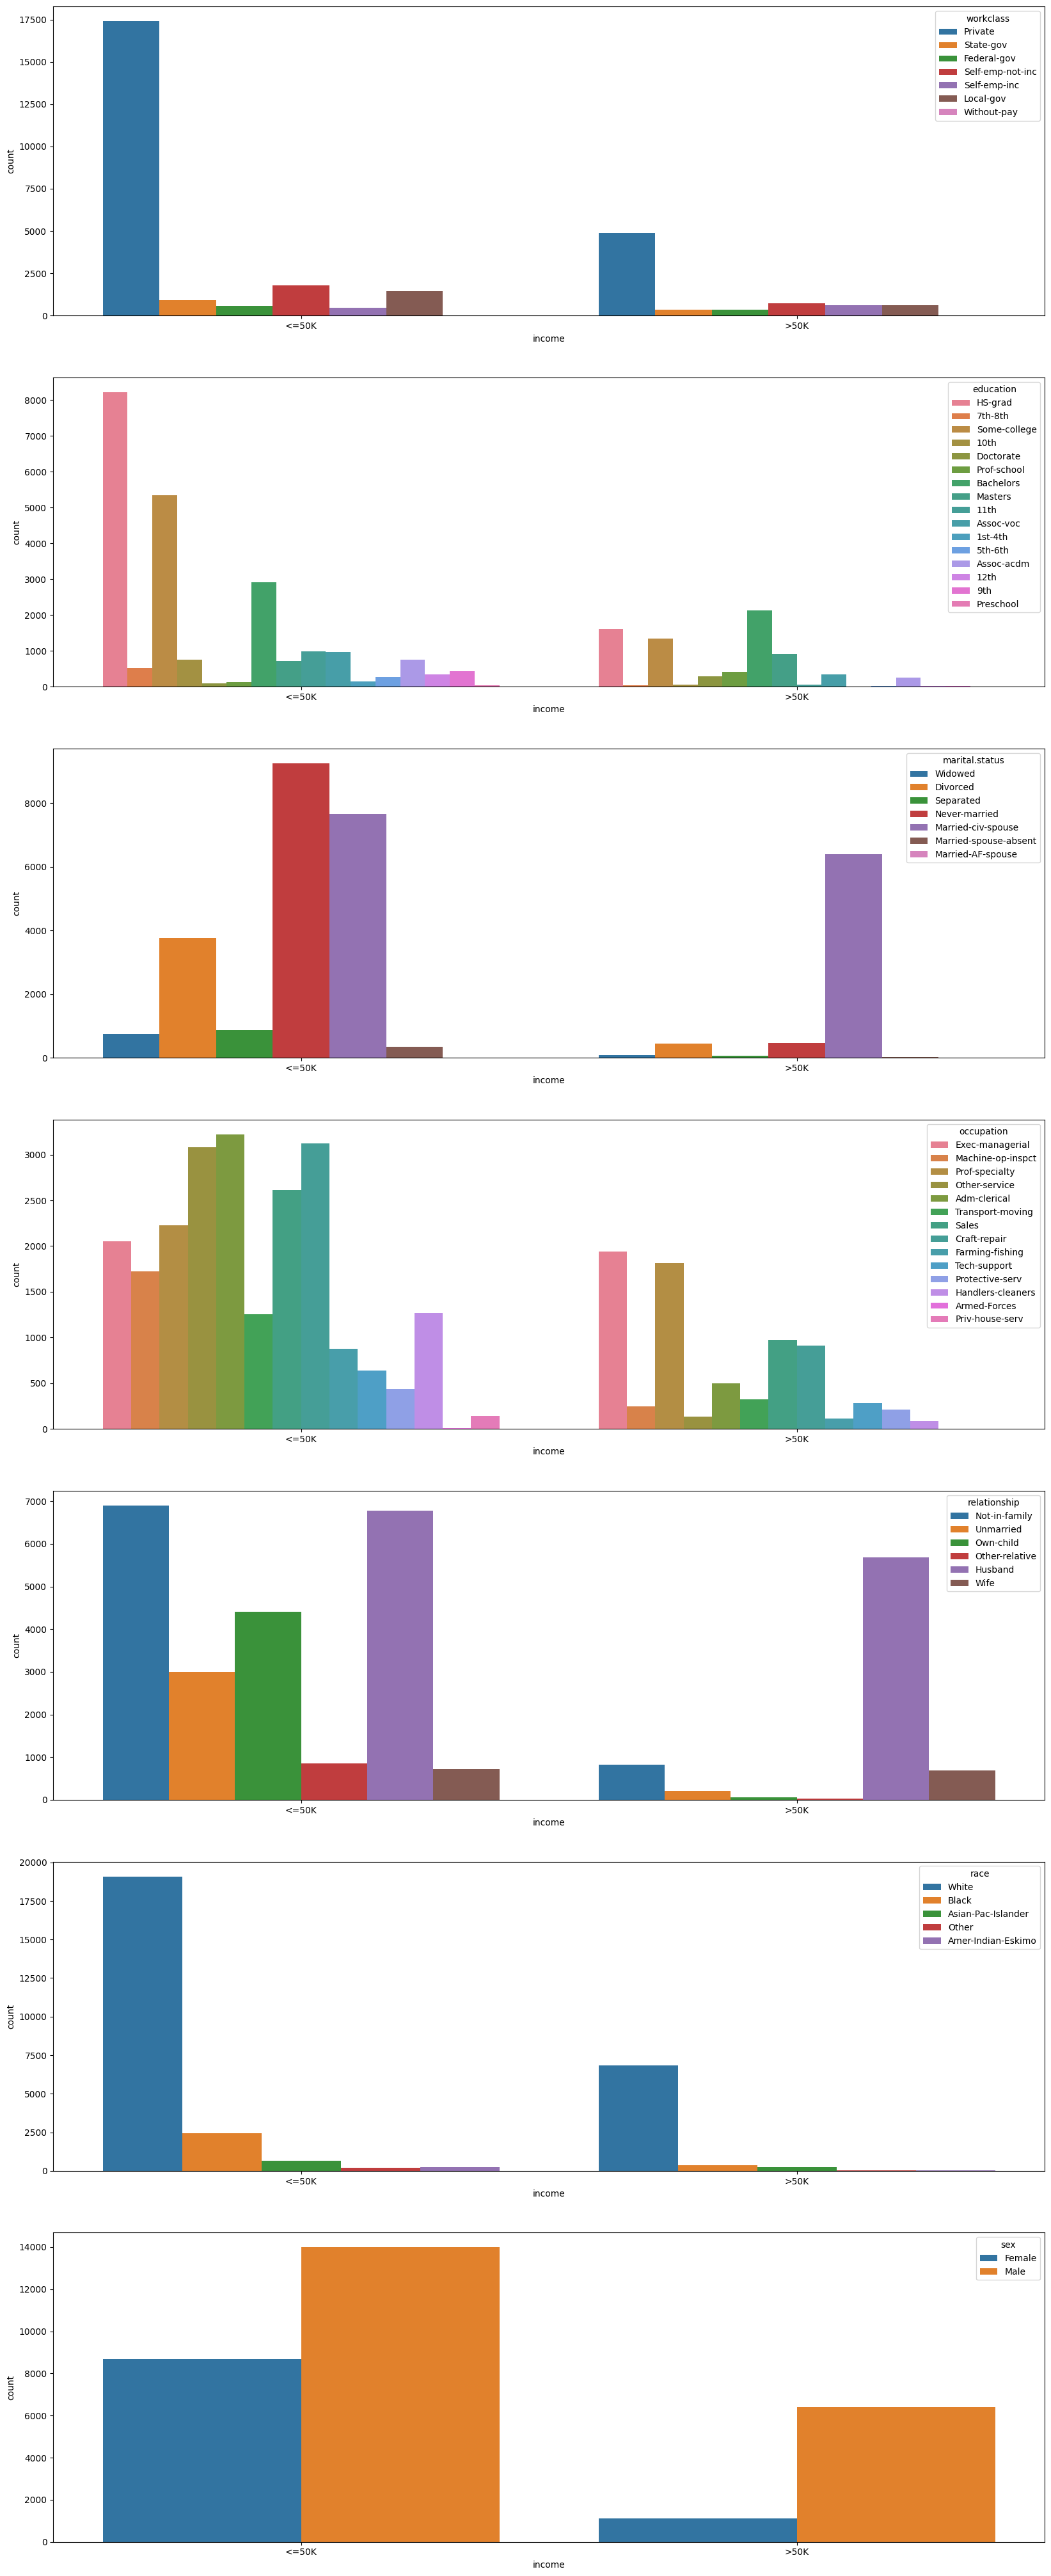

In [49]:
counter = 1
columns=['workclass','education','marital.status','occupation','relationship', 'race', 'sex']
plt.figure(figsize=(20,300))
for column in columns:
    plt.subplot(40,1,counter)
    counter+=1
    sns.countplot(x='income',hue=column ,data = df)

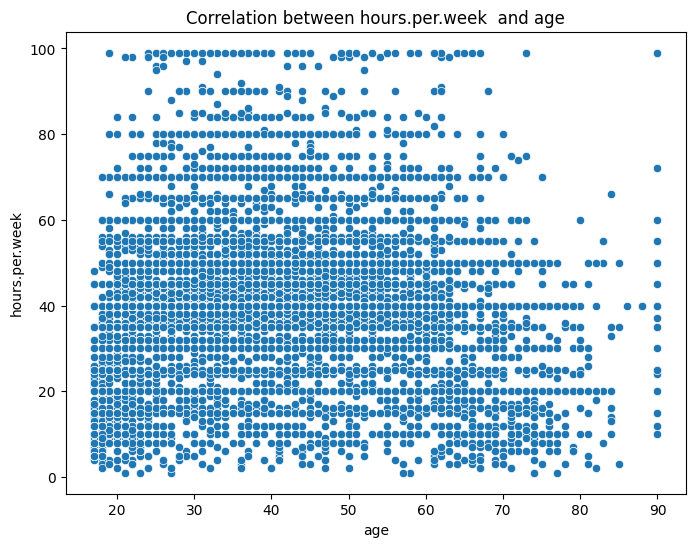

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours.per.week', data=df)

# Set labels and title for the plot
plt.xlabel('age')
plt.ylabel('hours.per.week')
plt.title('Correlation between hours.per.week  and age')

# Display the plot
plt.show()

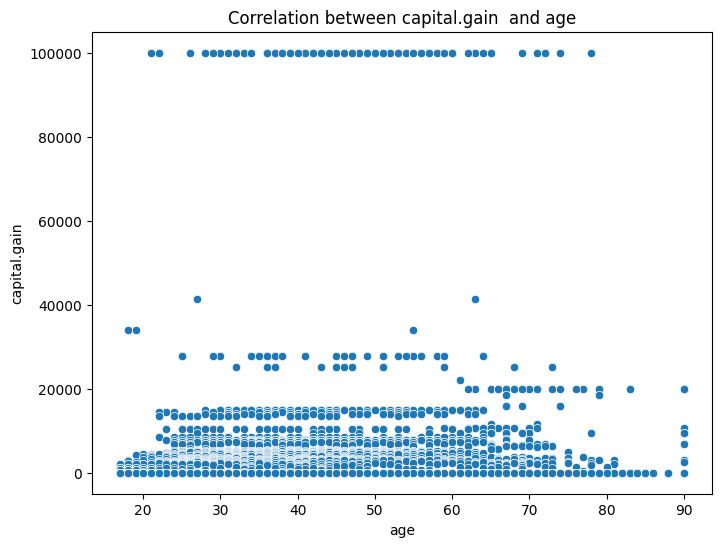

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='capital.gain', data=df)

# Set labels and title for the plot
plt.xlabel('age')
plt.ylabel('capital.gain')
plt.title('Correlation between capital.gain  and age')

# Display the plot
plt.show()

In [52]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


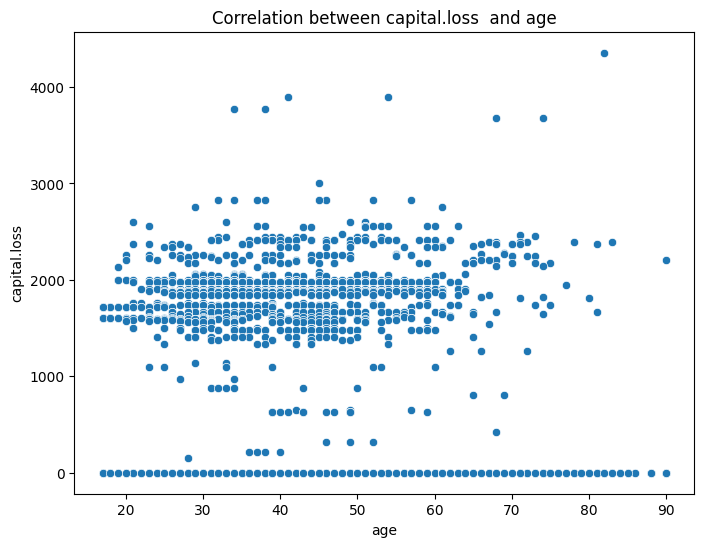

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='capital.loss', data=df)

# Set labels and title for the plot
plt.xlabel('age')
plt.ylabel('capital.loss')
plt.title('Correlation between capital.loss  and age')

# Display the plot
plt.show()

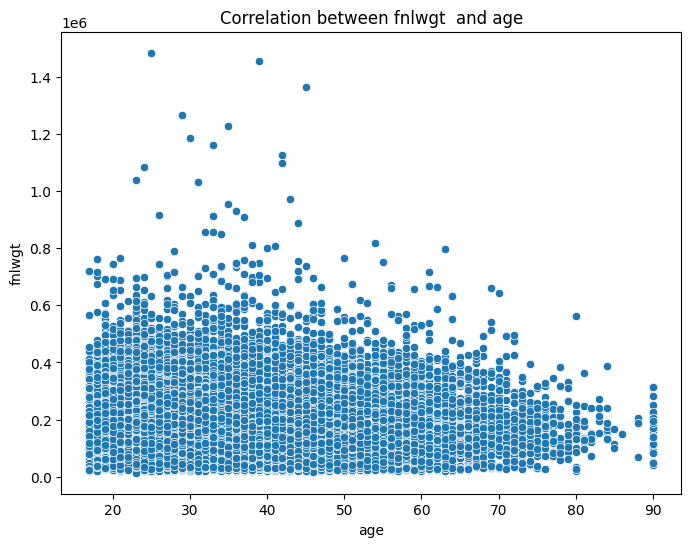

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fnlwgt', data=df)

# Set labels and title for the plot
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.title('Correlation between fnlwgt  and age')

# Display the plot
plt.show()

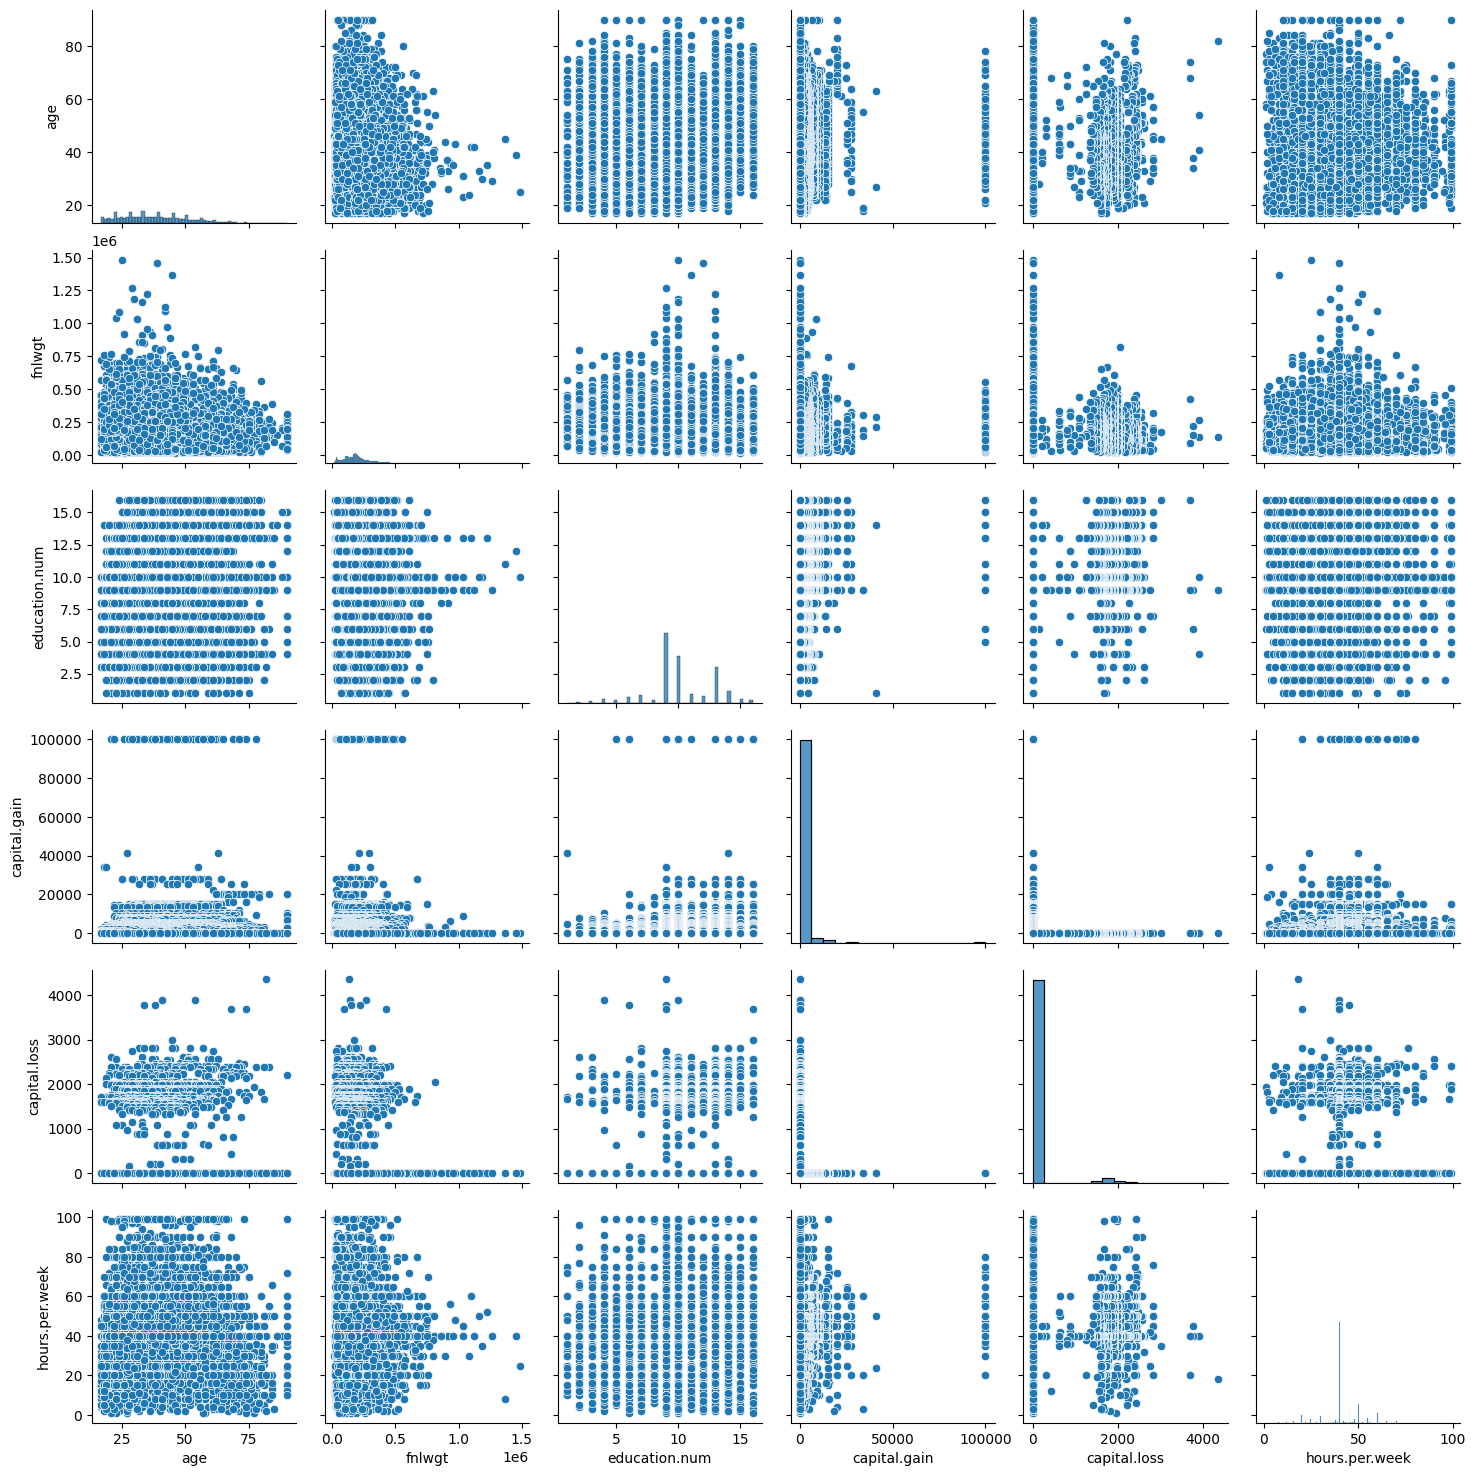

In [55]:
sns.pairplot(df)
plt.show()

## Preprocessing

In [57]:
df.duplicated().sum()

np.int64(23)

In [58]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30135,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30136,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30137,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [59]:
x = df.drop(['income','education'],axis=1)
y = df.drop(['income'],axis=1)
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
x_train


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2290,55,State-gov,175127,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7688,0,38,United-States
4472,49,Local-gov,120451,6,Separated,Other-service,Unmarried,Black,Female,0,0,40,United-States
5478,36,Private,188834,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States
27310,37,Private,99146,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
28148,19,Private,174732,10,Never-married,Other-service,Own-child,Black,Male,0,0,25,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,24,Private,456367,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
5390,50,State-gov,211319,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,38,United-States
860,25,Private,193820,13,Never-married,Sales,Not-in-family,White,Female,0,1876,40,United-States
15795,45,Private,198759,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States


In [60]:
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub] = ub
    data[data < lb] = lb 
    return data, ub, lb

In [61]:
def handle_outliers_test(test_data, ub_train, lb_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data

In [63]:
outliers = ['age', 'education.num', 'fnlwgt', 'capital.gain','capital.loss','hours.per.week']
for col in outliers:
    x_train[col], ub_train, lb_train = handle_outliers(x_train[col])
    x_train[col] = handle_outliers_test(x_train[col], ub_train, lb_train)

C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\731086734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] = ub
C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\731086734.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[data > ub] = ub
C:\Users\fakhr\AppData\Local\Temp\ipykernel_3304\2439072140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data > ub_train] = ub_train
C:\Users\fakhr\AppData\Local\

In [70]:
le = LabelEncoder()
for col in ['workclass','marital.status','occupation','relationship','race','sex','native.country']:
    x_test[col]= le.fit_transform(x_test[col])
    x_train[col]= le.fit_transform(x_train[col])

In [73]:
standard_scaler = StandardScaler()
x_train[["age", "fnlwgt", "hours.per.week", "capital.loss",'capital.gain']] = standard_scaler.fit_transform(x_train[["age", "fnlwgt", 
                                                                                                                     "hours.per.week", "capital.loss",'capital.gain']])
x_test[["age", "fnlwgt", "hours.per.week", "capital.loss",'capital.gain']] = standard_scaler.transform(x_test[["age", "fnlwgt", 
                                                                                                               "hours.per.week", "capital.loss",'capital.gain']])
x_train

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2290,1.272167,5,-0.120316,13,2,0,0,4,1,0.0,0.0,-0.557652,38
4472,0.810987,1,-0.694441,6,5,7,4,2,0,0.0,0.0,-0.233113,38
5478,-0.188236,2,0.023615,5,2,13,0,4,1,0.0,0.0,1.389578,38
27310,-0.111372,2,-0.918154,13,2,11,0,4,1,0.0,0.0,1.795251,38
28148,-1.494912,2,-0.124463,10,4,7,3,2,1,0.0,0.0,-1.450132,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-1.110595,2,2.408360,9,2,2,0,4,1,0.0,0.0,-0.233113,38
5390,0.887851,5,0.259719,14,4,9,1,4,1,0.0,0.0,-0.557652,38
860,-1.033732,2,0.075970,13,4,11,1,4,0,0.0,0.0,-0.233113,38
15795,0.503534,2,0.127832,16,2,3,0,4,1,0.0,0.0,1.795251,38


In [74]:
X_train_scaled = x_train.copy()
X_test_scaled = x_test.copy()

In [75]:
X_train_scaled.to_csv("cleaned_data/X_train_scaled.csv")
X_test_scaled.to_csv("cleaned_data/X_test_scaled.csv")
y_train.to_csv("cleaned_data/y_train.csv")
y_test.to_csv("cleaned_data/y_test.csv")

In [ ]:
# https://github.com/Fakhr-eldeen/data-science-portfolio